# LOSS AND ERROR RATE ON CIFAR -- Exercise

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the CIFAR dataset -- check the size carefully!

In [2]:
train_data=torch.load('../../data/cifar/train_data.pt')
train_label=torch.load('../../data/cifar/train_label.pt')
test_data=torch.load('../../data/cifar/test_data.pt')

print(train_data.size())

torch.Size([50000, 3, 32, 32])


### Make a ONE layer net class. 

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=True)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net.   

In [4]:
net= one_layer_net(3072,10)

print(net)

one_layer_net(
  (linear_layer): Linear(in_features=3072, out_features=10, bias=True)
)


### Choose the criterion and optimizer. Also choose:

### batchsize = 20

### learning rate = 0.01

In [5]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=20

# You only have to complete this cell

### Do 40 passes through the training set (which contains 50,000 images -- not 60,000 like mnist!)

In [8]:
for epoch in range(40): 
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices= torch.randperm(50000)
 
    for count in range(0,50000,bs):
    
        optimizer.zero_grad()
        
        # create a minibatch       
        indices=           shuffled_indices[count:count+bs]
        minibatch_data =   train_data[indices]
        minibatch_label=   train_label[indices]

        # reshape the minibatch
        inputs = minibatch_data.view(bs,3072)

        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()

        # forward the minibatch through the net 
        scores= net(inputs)

        # Compute the average of the losses of the data points in the minibatch
        loss =  criterion( scores, minibatch_label )
        
        # backward pass to compute dL/dU, dL/dV and dL/dW   
        loss.backward()

        # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
        optimizer.step()
        
        
        # START COMPUTING STATS
        
        num_batches+=1
        
        with torch.no_grad():
        
            # add the loss of this batch to the running loss
            running_loss += loss.item()

            # compute the error made on this batch and add it to the running error       
            error = utils.get_error(scores,minibatch_label)
            running_error +=error.item()     
        
        
        
    # compute stats for the full training set
    total_loss = running_loss / num_batches
    total_error =   running_error / num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
    
        
        

epoch= 0 	 loss= 1.9629659149646759 	 error= 69.61399994134902 percent
epoch= 1 	 loss= 1.864168672323227 	 error= 65.03599992275238 percent
epoch= 2 	 loss= 1.835442094898224 	 error= 63.9339999461174 percent
epoch= 3 	 loss= 1.8190158752918244 	 error= 63.26400003671646 percent
epoch= 4 	 loss= 1.8070479268550872 	 error= 62.82200002193451 percent
epoch= 5 	 loss= 1.7955050144195557 	 error= 62.55800001382828 percent
epoch= 6 	 loss= 1.7896142483711244 	 error= 62.02600000143052 percent
epoch= 7 	 loss= 1.7861915515899658 	 error= 61.80000002145767 percent
epoch= 8 	 loss= 1.7768090767383575 	 error= 61.45200000524521 percent
epoch= 9 	 loss= 1.7712311892986297 	 error= 61.27600001096726 percent
epoch= 10 	 loss= 1.7707227377176284 	 error= 61.309999999999995 percent
epoch= 11 	 loss= 1.7656494879722595 	 error= 60.92400006532669 percent
epoch= 12 	 loss= 1.7630314237833022 	 error= 61.05399999380112 percent
epoch= 13 	 loss= 1.7590023533582688 	 error= 60.600000104904176 percent
epo

### Choose image at random from the test set and see how good/bad are the predictions

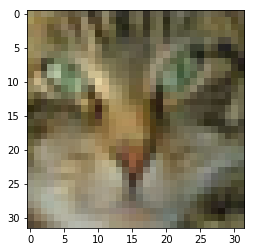

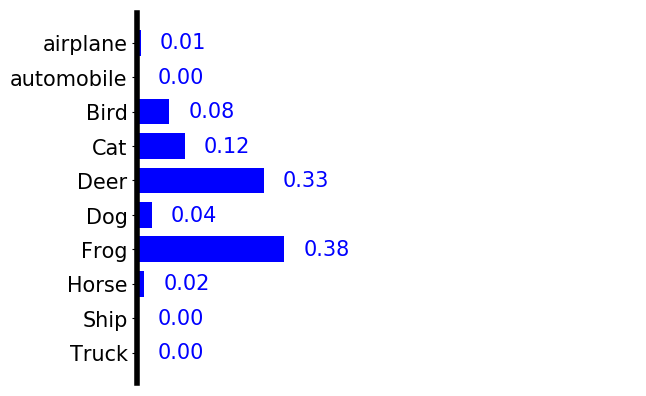

In [9]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,3072)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_cifar(probs)